# analysis of pp-SRC c.m. momentum simulations

# imports

In [1]:
from notebook_tools import *
%matplotlib inline

# read data

runs 20,000-30,000

sims0 = pd.read_csv( '/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs20000to30000_NsigmaT_10_NSigmaZa1_5_NSigmaZa2_8_NMeanZa1_5_NMeanZa2_5_NRand_10_simulationruns_results.csv')

runs 50,000 to 68,746

sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs50000to68746_NsigmaT_15_NSigmaZa1_10_NSigmaZa2_5_NMeanZa1_5_NMeanZa2_5_NRand_10_simulationruns_results.csv')

runs 100,000 to 200800

sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs100000to200799_10SigmaT_10SigmaZa1_10SigmaZa2_10MeanZa1_10MeanZa2_10NRand_results.csv')

sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs500000to5018543_30SigmaT_5SigmaZa1_5SigmaZa2_5MeanZa1_5MeanZa2_10NRand_results.csv',na_filter=0.0)

In [2]:
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs600000to6018605_30SigmaT_5SigmaZa1_5SigmaZa2_5MeanZa1_5MeanZa2_10NRand_results.csv',na_filter=0.0)

In [11]:
def draw_PvalWeighting(var='SigmaX', xlabel='',bins=50,target='12C',
                       PvalTotWeight=None,legend_loc='bbox',                       
                       x_range = None,                       
                       y_range = None,                       
                       xtext = None , ytext=None,                       
                       do_save_fig=False,
                       figsize=(10,10),                       
                       fontsize=20):
    weights=[sims.run/sims.run,sims['Pval'+var+'_weighted_'+target],sims['PvalTotal_unweighted_%s'%target]]#['PvalTotal_%s'%target]]    
    weighting_labels=['generated','weighted by $Pval(\\sigma_{x})$','weighted by $Pval(total)$']   

    if target=='12C' : 
        weights.append(sims.KStPval)
        weighting_labels.append('$KS-p_t$ weighted')
        
    histograms , bins = plot_1d_withoutandwithweight(sims['gen'+var],
                                                     weights=weights,
                                                     weighting_labels = weighting_labels,
                                                     bins=bins,
                                                     legend_loc=legend_loc,
                                                     xlabel=xlabel,
                                                     ylabel='1k runs weighted [a.u.]',
                                                     x_range=x_range,                                                    
                                                     y_range=y_range,
                                                    figsize=figsize,
                                                    fontsize=fontsize);
    do_show_gaussians = [False , True , True , False]
    
    for hw,weight,weighting_label,do_show_gaussian in zip(histograms,weights,weighting_labels,do_show_gaussians):
        mu = np.average(sims['gen'+var] , weights=weight)
        variance = np.average((sims['gen'+var]-mu)**2, weights=weight)
        sigma = np.sqrt(variance)                                                                           
        print weighting_label + ': \n mean=%.3f , stdev=%.3f'%(mu,sigma)
    
    if do_save_fig: 
        plt.tight_layout()
        plt.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/AcceptanceCorrection'+var+'_'+target+'.pdf')
    
def draw_PvalWeighting_2d( df , v1 , v2 , bins=40 , weights=None , cmap='Greys' ,
                          xlabel=None,ylabel=None ,
                         figsize=(10,10),title=None):
    fig,ax=plt.subplots(figsize=figsize)
    plt.hist2d(df[v1],df[v2],bins=bins,weights=weights,cmap=cmap);
    plt.colorbar()
    set_axes( ax , x_label , y_label )
    ax.set_title(title)
    
    
def draw_all_PvalWeighting_2d(v1='SigmaZa1' , v2='SigmaZa2' ,
                              xlabel='$\\sigma_{z}-a_{1}$',ylabel='$\\sigma_{z}-a_{2}$ [GeV/c]' ,
                              bins=40,
                              figsize=(10,10),
                              weights=None,
                              cmaps=None):
    
    for weight,cmap in zip(weights,cmaps):
        print weight , cmap
        title=weight
        weight=sims[weight] if weight is not None else None
        draw_PvalWeighting_2d( sims , 'gen'+v1 , 'gen'+v2 , bins=bins , weights=weight  , cmap=cmap ,
                              xlabel=xlabel,ylabel=ylabel, figsize=figsize , title=title);


# histograms of generated, and generated+weighted

for target in ['12C','27Al','56Fe','208Pb']:
    sims['PvalTotal_%s'%target]  = Fisher_combination_Pvals_pandas([sims['PvalSigmaX_unweighted_%s'%target]
                                                                    ,sims['PvalSigmaY_unweighted_%s'%target]                                                           
                                                                    ,sims['PvalMeanZa1_unweighted_%s'%target]                                                           
                                                                    ,sims['PvalMeanZa2_unweighted_%s'%target]]);
#                                                                     ,sims['PvalSigmaZa2_unweighted_%s'%target]]);

generated: 
 mean=0.165 , stdev=0.030
weighted by $Pval(\sigma_{x})$: 
 mean=0.163 , stdev=0.017
weighted by $Pval(total)$: 
 mean=0.169 , stdev=0.015


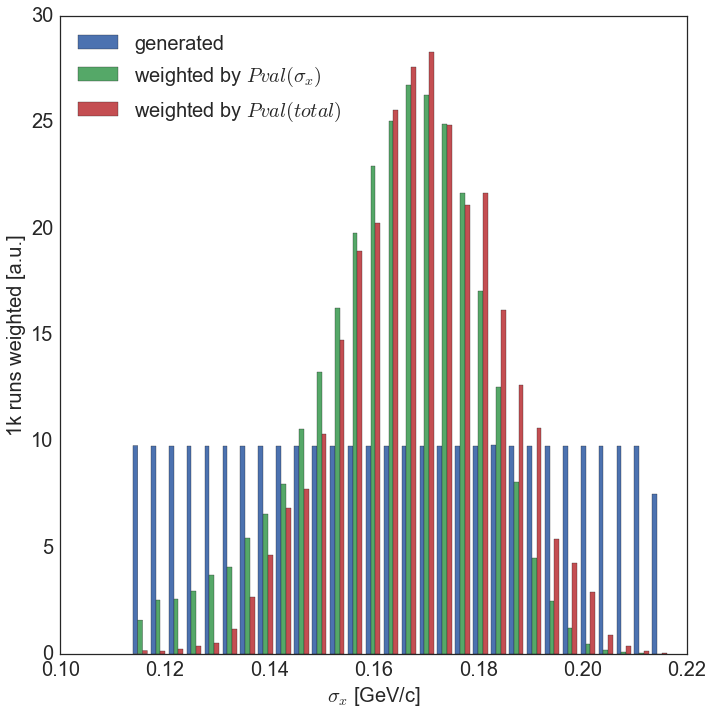

In [19]:
draw_PvalWeighting(var='SigmaX',xlabel='$\\sigma_{x}$ [GeV/c]',bins=30,x_range=(0.1,0.22),target='56Fe',
                                legend_loc='upper left',do_save_fig=True)

In [ ]:
# draw_PvalWeighting_Fit2Gaussian(var='SigmaY',xlabel='$\\sigma_{y}$ [GeV/c]',bins=30,x_range=(0.1,0.22),target='12C')

draw_PvalWeighting_Fit2Gaussian(var='MeanX',xlabel='$\\mu_{x}$ [GeV/c]',bins=30,x_range=(-0.1,0.1))
draw_PvalWeighting_Fit2Gaussian(var='MeanY',xlabel='$\\mu_{y}$ [GeV/c]',bins=30,x_range=(-0.1,0.1))

In [ ]:
draw_PvalWeighting_Fit2Gaussian(var='SigmaZa1',xlabel='$\\sigma_{z}-a_{1}$',
                                bins=20,do_fit_gaussian=False,x_range=(-0.1,1.4),xtext=0.23)

In [ ]:
draw_PvalWeighting_Fit2Gaussian(var='SigmaZa2',xlabel='$\\sigma_{z}-a_{2}$ [GeV/c]',
                                bins=20,do_fit_gaussian=False)

In [ ]:
draw_PvalWeighting_Fit2Gaussian(var='MeanZa1',xlabel='$\\mu_{z}-a_{1}$',
                                bins=10,x_range=(0.35,0.85),xtext=0.82,do_fit_gaussian=False,legend_loc='none')

In [ ]:
draw_PvalWeighting_Fit2Gaussian(var='MeanZa2',xlabel='$\\mu_{z}-a_{2}$ [GeV/c]',
                                bins=10,legend_loc='upper left',xtext=-0.34,ytext=0.23,do_fit_gaussian=False)

(array([  4.94363860e-01,   3.15884927e-01,   4.82446166e-01,
          1.42780670e+00,   5.12125225e+00,   1.13054514e+01,
          9.82378907e+00,   2.61632613e+00,   2.64878319e-01,
          4.91688457e-03]),
 array([ 0.1135,  0.1238,  0.1341,  0.1444,  0.1547,  0.165 ,  0.1753,
         0.1856,  0.1959,  0.2062,  0.2165]),
 <a list of 10 Patch objects>)

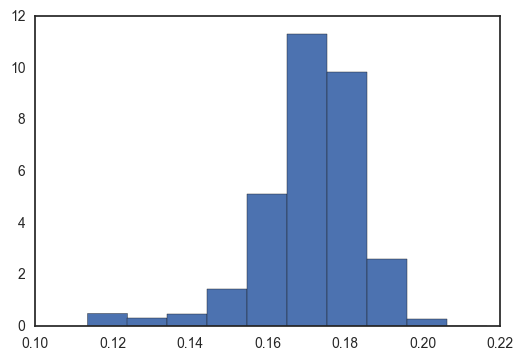

In [29]:
pvalues_array=[
    sims.PvalMeanZa1_unweighted_56Fe,
               
               
               sims.PvalMeanZa2_unweighted_56Fe,
               
#                sims.PvalSigmaZa2_unweighted_56Fe,
               
#                sims.PvalSigmaZa1_unweighted_56Fe,
               
               sims.PvalSigmaX_unweighted_56Fe,
               
               sims.PvalSigmaY_unweighted_56Fe]

plt.hist(sims.genSigmaX,weights=Fisher_combination_Pvals(pvalues_array=pvalues_array))

# runs 100,000 to 200,7999

In [ ]:
draw_PvalWeighting_Fit2Gaussian(var='SigmaZa1',xlabel='$\\sigma_{z}-a_{1}$',
                                bins=20,do_fit_gaussian=False,x_range=(-1,2.4),y_range=(0,1.7),xtext=0.23)
draw_PvalWeighting_Fit2Gaussian(var='SigmaZa2',xlabel='$\\sigma_{z}-a_{2}$ [GeV/c]',
                                bins=20,x_range=(-0.3,0.2),do_fit_gaussian=False)

# runs 300,000 to 460,000

In [ ]:
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs300000to460000_NsigmaT_1_NSigmaZa1_20_NSigmaZa2_20_NMeanZa1_20_NMeanZa2_20_NRand_10_simulationruns_results.csv')

sum up Pval for only two variables at a time

In [ ]:
PvalMeanZa1MeanZa2 , PvalSigmaZa1SigmaZa2 , PvalSigmaZa1MeanZa2 , PvalSigmaZa2MeanZa1 , PvalSigmaZa1MeanZa1 , PvalSigmaZa2MeanZa2 = [] , [] , [] , [], [], []
for index, row in sims.iterrows():
    if index%10000==0 : print index
    PvalSigmaZa1SigmaZa2.append(Fisher_combination_Pvals( [ row.PvalSigmaZa1_unweighted , row.PvalSigmaZa2_unweighted ] ) ) 
    PvalMeanZa1MeanZa2.append(Fisher_combination_Pvals( [ row.PvalMeanZa1_unweighted , row.PvalMeanZa2_unweighted ] ) ) 
    
    PvalSigmaZa1MeanZa1.append(Fisher_combination_Pvals( [ row.PvalSigmaZa1_unweighted , row.PvalMeanZa1_unweighted ] ) )    
    PvalSigmaZa1MeanZa2.append(Fisher_combination_Pvals( [ row.PvalSigmaZa1_unweighted , row.PvalMeanZa2_unweighted ] ) )
    
    PvalSigmaZa2MeanZa1.append(Fisher_combination_Pvals( [ row.PvalSigmaZa2_unweighted , row.PvalMeanZa1_unweighted ] ) )
    PvalSigmaZa2MeanZa2.append(Fisher_combination_Pvals( [ row.PvalSigmaZa2_unweighted , row.PvalMeanZa2_unweighted ] ) )
print 'done.'

In [ ]:
sims['PvalSigmaZa1SigmaZa2'] = PvalSigmaZa1SigmaZa2
sims['PvalMeanZa1MeanZa2'] = PvalMeanZa1MeanZa2
sims['PvalSigmaZa1MeanZa1'] = PvalSigmaZa1MeanZa1
sims['PvalSigmaZa1MeanZa2'] = PvalSigmaZa1MeanZa2
sims['PvalSigmaZa2MeanZa1'] = PvalSigmaZa2MeanZa1
sims['PvalSigmaZa2MeanZa2'] = PvalSigmaZa2MeanZa2

In [ ]:
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs300000to460000_1sT_20sZa1_20sZa2_20mZa1_20mZa2_10r_results.csv')

In [ ]:
draw_PvalWeighting_Fit2Gaussian(var='SigmaX',xlabel='$\\sigma_{x}$ [GeV/c]',bins=15)
draw_PvalWeighting_Fit2Gaussian(var='SigmaY',xlabel='$\\sigma_{y}$ [GeV/c]',bins=15)

In [ ]:
draw_PvalWeighting_Fit2Gaussian(var='SigmaZa1',xlabel='$\\sigma_{z}-a_{1}$',
                                bins=20,do_fit_gaussian=False,x_range=(-.1,2.4),y_range=(0,1.7),xtext=0.23)
draw_PvalWeighting_Fit2Gaussian(var='SigmaZa2',xlabel='$\\sigma_{z}-a_{2}$ [GeV/c]',
                                bins=20,x_range=(-0.55,0.55),do_fit_gaussian=False)

In [ ]:
draw_PvalWeighting_Fit2Gaussian(var='MeanZa1',xlabel='$\\mu_{z}-a_{1}$',
                                bins=10,x_range=(0.,1.2),xtext=0.82,do_fit_gaussian=False,legend_loc='none')
draw_PvalWeighting_Fit2Gaussian(var='MeanZa2',xlabel='$\\mu_{z}-a_{2}$',
                                bins=10,x_range=(-0.55,0.55),xtext=0.82,do_fit_gaussian=False,legend_loc='none')

In [ ]:
cmaps = ['Blues' , 'Reds' , 'Greens' , 'Purples']

In [ ]:
weights = [None , 'PvalSigmaZa1SigmaZa2' , 'PvalTotal_unweighted' , 'KStPval_avg' ]
draw_all_PvalWeighting_2d(v1='SigmaZa1' , v2='SigmaZa2', bins=41 ,
                          xlabel='$\\sigma_{z}-a_{1}$',ylabel='$\\sigma_{z}-a_{2}$ [GeV/c]' ,
                          weights=weights,cmaps=cmaps);

In [ ]:
weights = [None , 'PvalMeanZa1MeanZa2' , 'PvalTotal_unweighted' , 'KSPval_tot' ]
draw_all_PvalWeighting_2d(v1='MeanZa1' , v2='MeanZa2', bins=41 ,
                          xlabel='$\\mu_{z}-a_{1}$',ylabel='$\\mu_{z}-a_{2}$ [GeV/c]' ,
                          weights=weights,cmaps=cmaps);

In [ ]:
weights = [None , 'PvalSigmaZa2MeanZa1' , 'PvalTotal_unweighted' , 'KSPval_tot' ]
draw_all_PvalWeighting_2d(v1='MeanZa1' , v2='SigmaZa2', bins=41 ,
                          xlabel='$\\mu_{z}-a_{1}$',ylabel='$\\sigma_{z}-a_{2}$ [GeV/c]' ,
                          weights=weights,cmaps=cmaps);

In [ ]:
weights = [None , 'PvalSigmaZa2MeanZa2' , 'PvalTotal_unweighted' , 'KSPval_tot' ]
draw_all_PvalWeighting_2d(v1='MeanZa2' , v2='SigmaZa2', bins=41 ,
                          xlabel='$\\mu_{z}-a_{2}$',ylabel='$\\sigma_{z}-a_{2}$ [GeV/c]' ,
                          weights=weights,cmaps=cmaps);

In [ ]:
weights = [None , 'PvalSigmaZa1MeanZa1' , 'PvalTotal_unweighted' , 'KSPval_tot' ]
draw_all_PvalWeighting_2d(v1='MeanZa1' , v2='SigmaZa1', bins=41 ,
                          xlabel='$\\mu_{z}-a_{1}$',ylabel='$\\sigma_{z}-a_{1}$ [GeV/c]' ,
                          weights=weights,cmaps=cmaps);

In [ ]:
weights = [None , 'PvalSigmaZa1MeanZa2' , 'PvalTotal_unweighted' , 'KSPval_tot' ]
draw_all_PvalWeighting_2d(v1='MeanZa2' , v2='SigmaZa1', bins=41 ,
                          xlabel='$\\mu_{z}-a_{2}$',ylabel='$\\sigma_{z}-a_{1}$ [GeV/c]' ,
                          weights=weights,cmaps=cmaps);